In [9]:
import requests
from bs4 import BeautifulSoup

resp = requests.get('https://www.weather.go.kr/weather/observation/currentweather.jsp')
bs = BeautifulSoup(resp.text, 'lxml')
table = bs.find('table', class_='table_develop3')

data=[]

for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    
    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temperature = tds[5].text
            humidity = tds[9].text
            
            data.append([point,temperature,humidity])

data

[['강릉', '21.0', '99'],
 ['강진군', '26.4', '91'],
 ['강화', '23.3', '96'],
 ['거제', '25.8', '92'],
 ['거창', '23.6', '99'],
 ['경주시', '22.0', '98'],
 ['고산', '26.3', '100'],
 ['고창', '24.2', '100'],
 ['고창군', '24.5', '93'],
 ['고흥', '26.3', '96'],
 ['광양시', '25.3', '95'],
 ['광주', '23.2', '99'],
 ['구미', '22.9', '99'],
 ['군산', '24.5', '98'],
 ['금산', '23.6', '99'],
 ['김해시', '25.4', '95'],
 ['남원', '24.2', '100'],
 ['남해', '25.2', '97'],
 ['대관령', '18.1', '98'],
 ['대구', '23.0', '93'],
 ['대전', '22.5', '97'],
 ['동두천', '22.6', '98'],
 ['동해', '19.8', '99'],
 ['목포', '27.1', '90'],
 ['문경', '21.7', '100'],
 ['밀양', '25.9', '87'],
 ['백령도', '23.0', '94'],
 ['보령', '25.0', '93'],
 ['보성군', '26.8', '92'],
 ['보은', '22.2', '100'],
 ['봉화', '20.2', '100'],
 ['부산', '24.5', '95'],
 ['부안', '23.6', '100'],
 ['부여', '24.2', '98'],
 ['북강릉', '20.3', '98'],
 ['북창원', '28.9', '88'],
 ['북춘천', '22.2', '98'],
 ['산청', '24.8', '96'],
 ['상주', '21.7', '100'],
 ['서귀포', '26.1', '99'],
 ['서산', '24.7', '93'],
 ['서울', '22.7', '97'],
 ['성산', '28.3

In [10]:
#데이터를 csv 파일에 저장히기   weather.csv 

with open('weather.csv','w') as file:
    file.write('point, temperature, humidity \n')
    for i in data:
        file.write('{0},{1},{2} \n'.format(i[0],i[1],i[2]))

In [11]:
#저장한 파일을 이용해서 Dataframe 만들어서 앞에 5개만 보기!! 
%matplotlib inline
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv',index_col='point',encoding='euc-kr')
df.head()

,temperature,humidity
point,,
강릉,21.0,99
강진군,26.4,91
강화,23.3,96
거제,25.8,92
거창,23.6,99


In [12]:
# 몇개 지역의 데이터만 모아보기!! 
# ex 서울, 인천 등 원하는 도시 7개만 모아보기
city_df = df.loc[['서울','인천','대전','대구','광주','부산','울산']]
city_df.head(3)


,temperature,humidity
point,,
서울,22.7,97
인천,24.1,96
대전,22.5,97


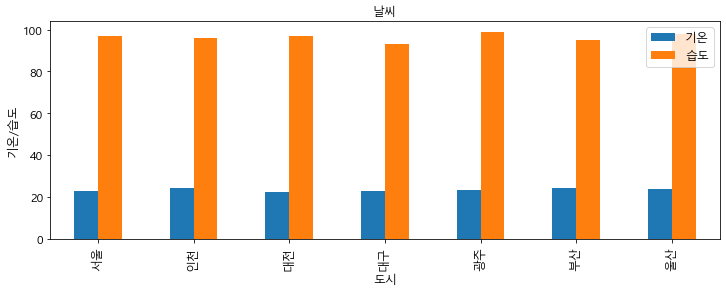

In [13]:
#기온,습도 데이터로 그래프 그래보기 
#font 설정
font_name = mpl.font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font',family=font_name)


ax = city_df.plot(kind='bar', title='날씨', figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)
ax.set_ylabel('기온/습도',fontsize=12)
ax.legend(['기온','습도'], fontsize=12)

create table weather(
point varchar2(20),
temperature number(5,2),
humidity number)

In [15]:
#db에 저장해보기!! 

import pandas as pd
import cx_Oracle

try:
    con = cx_Oracle.connect('hr', 'hr', 'xe')
    cursor = con.cursor()

    rows=[]
    for x in df.to_records(index=True):   
        rows.append((x[0],x[1],int(x[2])))

    cursor.executemany("insert into weather values(:1,:2,:3)", rows)
    
except Exception as e:
    print(e)
else:
    con.commit()
finally:
    cursor.close()
    con.close()

In [16]:
table =pd.read_html('https://www.weather.go.kr/weather/observation/currentweather.jsp',header=1,encoding='euc-kr')

In [18]:
point_df =table[0]

In [20]:
point_df[['지점','현재기온','습도%']]

,지점,현재기온,습도%
0,강릉,21.8,96
1,강화,23.6,96
2,거제,27.2,88
3,거창,23.7,98
4,고창군,24.3,91
...,...,...,...
59,충주,23.6,87
60,파주,24.8,88
61,함양군,24.1,96
62,합천,24.5,98
